# Library Import Initiation

In [1]:
import pandas as pd
import math
import json
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy

from sklearn.preprocessing import LabelEncoder, RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import joblib

In [3]:
process = {}

def show_process(add):
    global process
    if add not in process.values():
        index = len(process) + 1  # Ëá™Âä®ÈÄíÂ¢ûÁöÑkeyÔºå‰ªé1ÂºÄÂßã
        process[index] = add
        prdf = pd.DataFrame.from_dict(process, orient='index', columns=['Process'])
    return prdf

# Dataset Import and Primary processing

In [4]:
df = pd.read_csv("/Users/JackRuan/ÊñáÁ®ø(un-iCloud)/VScode_ipynb/CAPSTONE/Other/ad_performance.csv", index_col=0)
df = df.drop(columns=["channelcode"])

In [5]:
show_process("Data loaded")

Process
1  Data loaded

In [6]:
cols = df.columns.to_list()
print(cols)
for a in cols:
    print(f"{a}, {len(df[a].unique())}")

['uv', 'regis', 'search', 'visitdepth', 'stay', 'ocr', 'duration', 'material', 'placement', 'payment', 'size', 'sellingpoint']
uv, 809
regis, 104
search, 290
visitdepth, 848
stay, 871
ocr, 124
duration, 30
material, 4
placement, 5
payment, 4
size, 8
sellingpoint, 6


In [7]:
print("placement unique:", df['placement'].unique())
print("placement value counts:\n", df['placement'].value_counts())
print("sellingpoint unique:", df['sellingpoint'].unique())
print("sellingpoint value counts:\n", df['sellingpoint'].value_counts())

placement unique: ['banner' 'tips' '‰∏çÁ°ÆÂÆö' 'Ê®™ÂπÖ' 'ÊöÇÂÅú']
placement value counts:
 placement
Ê®™ÂπÖ        348
‰∏çÁ°ÆÂÆö       313
banner    154
tips       73
ÊöÇÂÅú          1
Name: count, dtype: int64
sellingpoint unique: ['ÊâìÊäò' 'Êª°Âáè' 'Êª°Ëµ†' 'ÁßíÊùÄ' 'Áõ¥Èôç' 'Êª°Ëøî']
sellingpoint value counts:
 sellingpoint
Áõ¥Èôç    345
ÊâìÊäò    214
Êª°Âáè    154
Êª°Ëøî     70
ÁßíÊùÄ     55
Êª°Ëµ†     51
Name: count, dtype: int64


In [8]:
# Âà†Èô§placement‰∏∫"ÊöÇÂÅú"ÁöÑË°å
df = df[df['placement'] != "ÊöÇÂÅú"]
df = df[df['material'] != "sp"]

# ÊõøÊç¢placement‰∏≠ÁöÑ"Ê®™ÂπÖ"‰∏∫"sub-banner"Ôºå"‰∏çÁ°ÆÂÆö"‰∏∫"uncertained"
df['placement'] = df['placement'].replace({"Ê®™ÂπÖ": "sub-banner", "‰∏çÁ°ÆÂÆö": "uncertained"})

df['sellingpoint'] = df['sellingpoint'].replace({
    "Áõ¥Èôç": "Price Drop",
    "ÊâìÊäò": "Discount",
    "Êª°Âáè": "Spend & Save",
    "Êª°Ëøî": "Cash/Coupon-Back",
    "Êª°Ëµ†": "Gift with Purchase",
    "ÁßíÊùÄ": "Flash Sale"
    })



In [9]:
show_process("Êó†Áî®Êï∞ÊçÆÂà†Èô§+‰∏≠ÊñáÊõøÊç¢")

Process
1  Data loaded
2  Êó†Áî®Êï∞ÊçÆÂà†Èô§+‰∏≠ÊñáÊõøÊç¢

In [10]:
print("placement unique:", df['placement'].unique())
print("placement value counts:\n", df['placement'].value_counts())

placement unique: ['banner' 'tips' 'uncertained' 'sub-banner']
placement value counts:
 placement
sub-banner     348
uncertained    313
banner         153
tips            73
Name: count, dtype: int64


In [11]:
print("sellingpoint unique:", df['sellingpoint'].unique())
print("sellingpoint value counts:\n", df['sellingpoint'].value_counts())

sellingpoint unique: ['Discount' 'Spend & Save' 'Gift with Purchase' 'Flash Sale' 'Price Drop'
 'Cash/Coupon-Back']
sellingpoint value counts:
 sellingpoint
Price Drop            343
Discount              214
Spend & Save          154
Cash/Coupon-Back       70
Flash Sale             55
Gift with Purchase     51
Name: count, dtype: int64


In [ ]:
# Decode 'ocr' column
df['ocr'] = df['ocr']* 100

In [14]:
show_process("\'OCR\'ÂàóËøòÂéü")

Process
1  Data loaded
2  Êó†Áî®Êï∞ÊçÆÂà†Èô§+‰∏≠ÊñáÊõøÊç¢
3     'OCR'ÂàóËøòÂéü

## Missing Value and Duplication Check

In [15]:
# Ê£ÄÊü•ÊòØÂê¶ÊúâÁ©∫ÂÄº
print("Nah Detected:")
print(df.isnull().sum())

# Ê£ÄÊü•ÊòØÂê¶ÊúâÈáçÂ§çÂÄº
duplicate_count = df.duplicated().sum()
print(f"Duplication Detected: {duplicate_count}")

Nah Detected:
uv              0
regis           0
search          0
visitdepth      0
stay            2
ocr             0
duration        0
material        0
placement       0
payment         0
size            0
sellingpoint    0
dtype: int64
Duplication Detected: 0


In [16]:
df['stay'] = df['stay'].fillna(df['stay'].mean())

In [17]:
print("Nah Detected:")
print(df.isnull().sum())

Nah Detected:
uv              0
regis           0
search          0
visitdepth      0
stay            0
ocr             0
duration        0
material        0
placement       0
payment         0
size            0
sellingpoint    0
dtype: int64


In [18]:
show_process("Á©∫ÂÄºÂ§ÑÁêÜ")

Process
1  Data loaded
2  Êó†Áî®Êï∞ÊçÆÂà†Èô§+‰∏≠ÊñáÊõøÊç¢
3     'OCR'ÂàóËøòÂéü
4         Á©∫ÂÄºÂ§ÑÁêÜ

# Variables Define

In [19]:
main_num_cols = ["uv", "search", "ocr"]
main_cat_cols = ["material", "placement", "payment", "sellingpoint"]

In [20]:
show_process("Columns defined")

Process
1      Data loaded
2      Êó†Áî®Êï∞ÊçÆÂà†Èô§+‰∏≠ÊñáÊõøÊç¢
3         'OCR'ÂàóËøòÂéü
4             Á©∫ÂÄºÂ§ÑÁêÜ
5  Columns defined

# num_var Handling

In [21]:
def calculate_outlier_proportion(dataf, columns, method="IQR"):
    """
    ËÆ°ÁÆó DataFrame ‰∏≠ÊØè‰∏™Êï∞ÂÄºÂèòÈáèÁöÑÂºÇÂ∏∏ÂÄºÂç†ÊØîÔºàÈªòËÆ§‰ΩøÁî® IQR Ê≥ïÔºâ
    
    ÂèÇÊï∞:
        df: pandas DataFrame
        columns: Ë¶ÅÊ£ÄÊµãÁöÑÂàóÂêçÂàóË°®ÔºåÈªòËÆ§Ëá™Âä®Ê£ÄÊµãÊï∞ÂÄºÂàó
        method: ÊöÇÊó∂ÊîØÊåÅ "IQR"
    
    ËøîÂõû:
        pandas DataFrameÔºåÂåÖÂê´ÂèòÈáèÂêç„ÄÅÂºÇÂ∏∏ÂÄºÊï∞Èáè„ÄÅÊÄªÊï∞„ÄÅÂç†ÊØî%
    """

    outlier_info = []

    for col in columns:
        series = dataf[col].dropna()
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outliers = series[(series < lower) | (series > upper)]
        outlier_count = len(outliers)
        total_count = len(series)
        proportion = outlier_count / total_count * 100

        outlier_info.append({
            "Variable": col,
            "Outliers": outlier_count,
            "Total": total_count,
            "Proportion (%)": round(proportion, 2)
        })

    return print(pd.DataFrame(outlier_info))


def plot_outliers(num_cols, dataf):
    sns.set_theme(style="whitegrid")

    cols_per_row = 3
    num_plots = len(num_cols)
    num_rows = math.ceil(num_plots / cols_per_row)

    fig, axes = plt.subplots(
        nrows=num_rows,
        ncols=cols_per_row,
        figsize=(3.2 * cols_per_row, 4.5 * num_rows),
        dpi=300
    )
    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        ax = axes[i]
        
        # Áîª boxplot
        sns.boxplot(y=dataf[col], ax=ax, color="skyblue", width=0.5, fliersize=0)  # ÂÖ≥Èó≠ÈªòËÆ§ÁöÑÂºÇÂ∏∏ÁÇπÊòæÁ§∫

        # ÊâãÂä®ËÆ°ÁÆó outliersÔºàIQRÊñπÊ≥ïÔºâ
        Q1 = dataf[col].quantile(0.25)
        Q3 = dataf[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = dataf[(dataf[col] < lower_bound) | (dataf[col] > upper_bound)][col]

        # ÁîªÁ∫¢ÁÇπ
        ax.scatter([0] * len(outliers), outliers, color='pink', s=10, label='Outlier', zorder=3)

        ax.set_title(f"{col}", fontsize=10, fontweight='bold')
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.grid(True, linestyle="--", alpha=0.5)

    for j in range(num_plots, len(axes)):
        axes[j].axis("off")

    plt.tight_layout(pad=1.0)
    plt.show()

    calculate_outlier_proportion(dataf, num_cols)

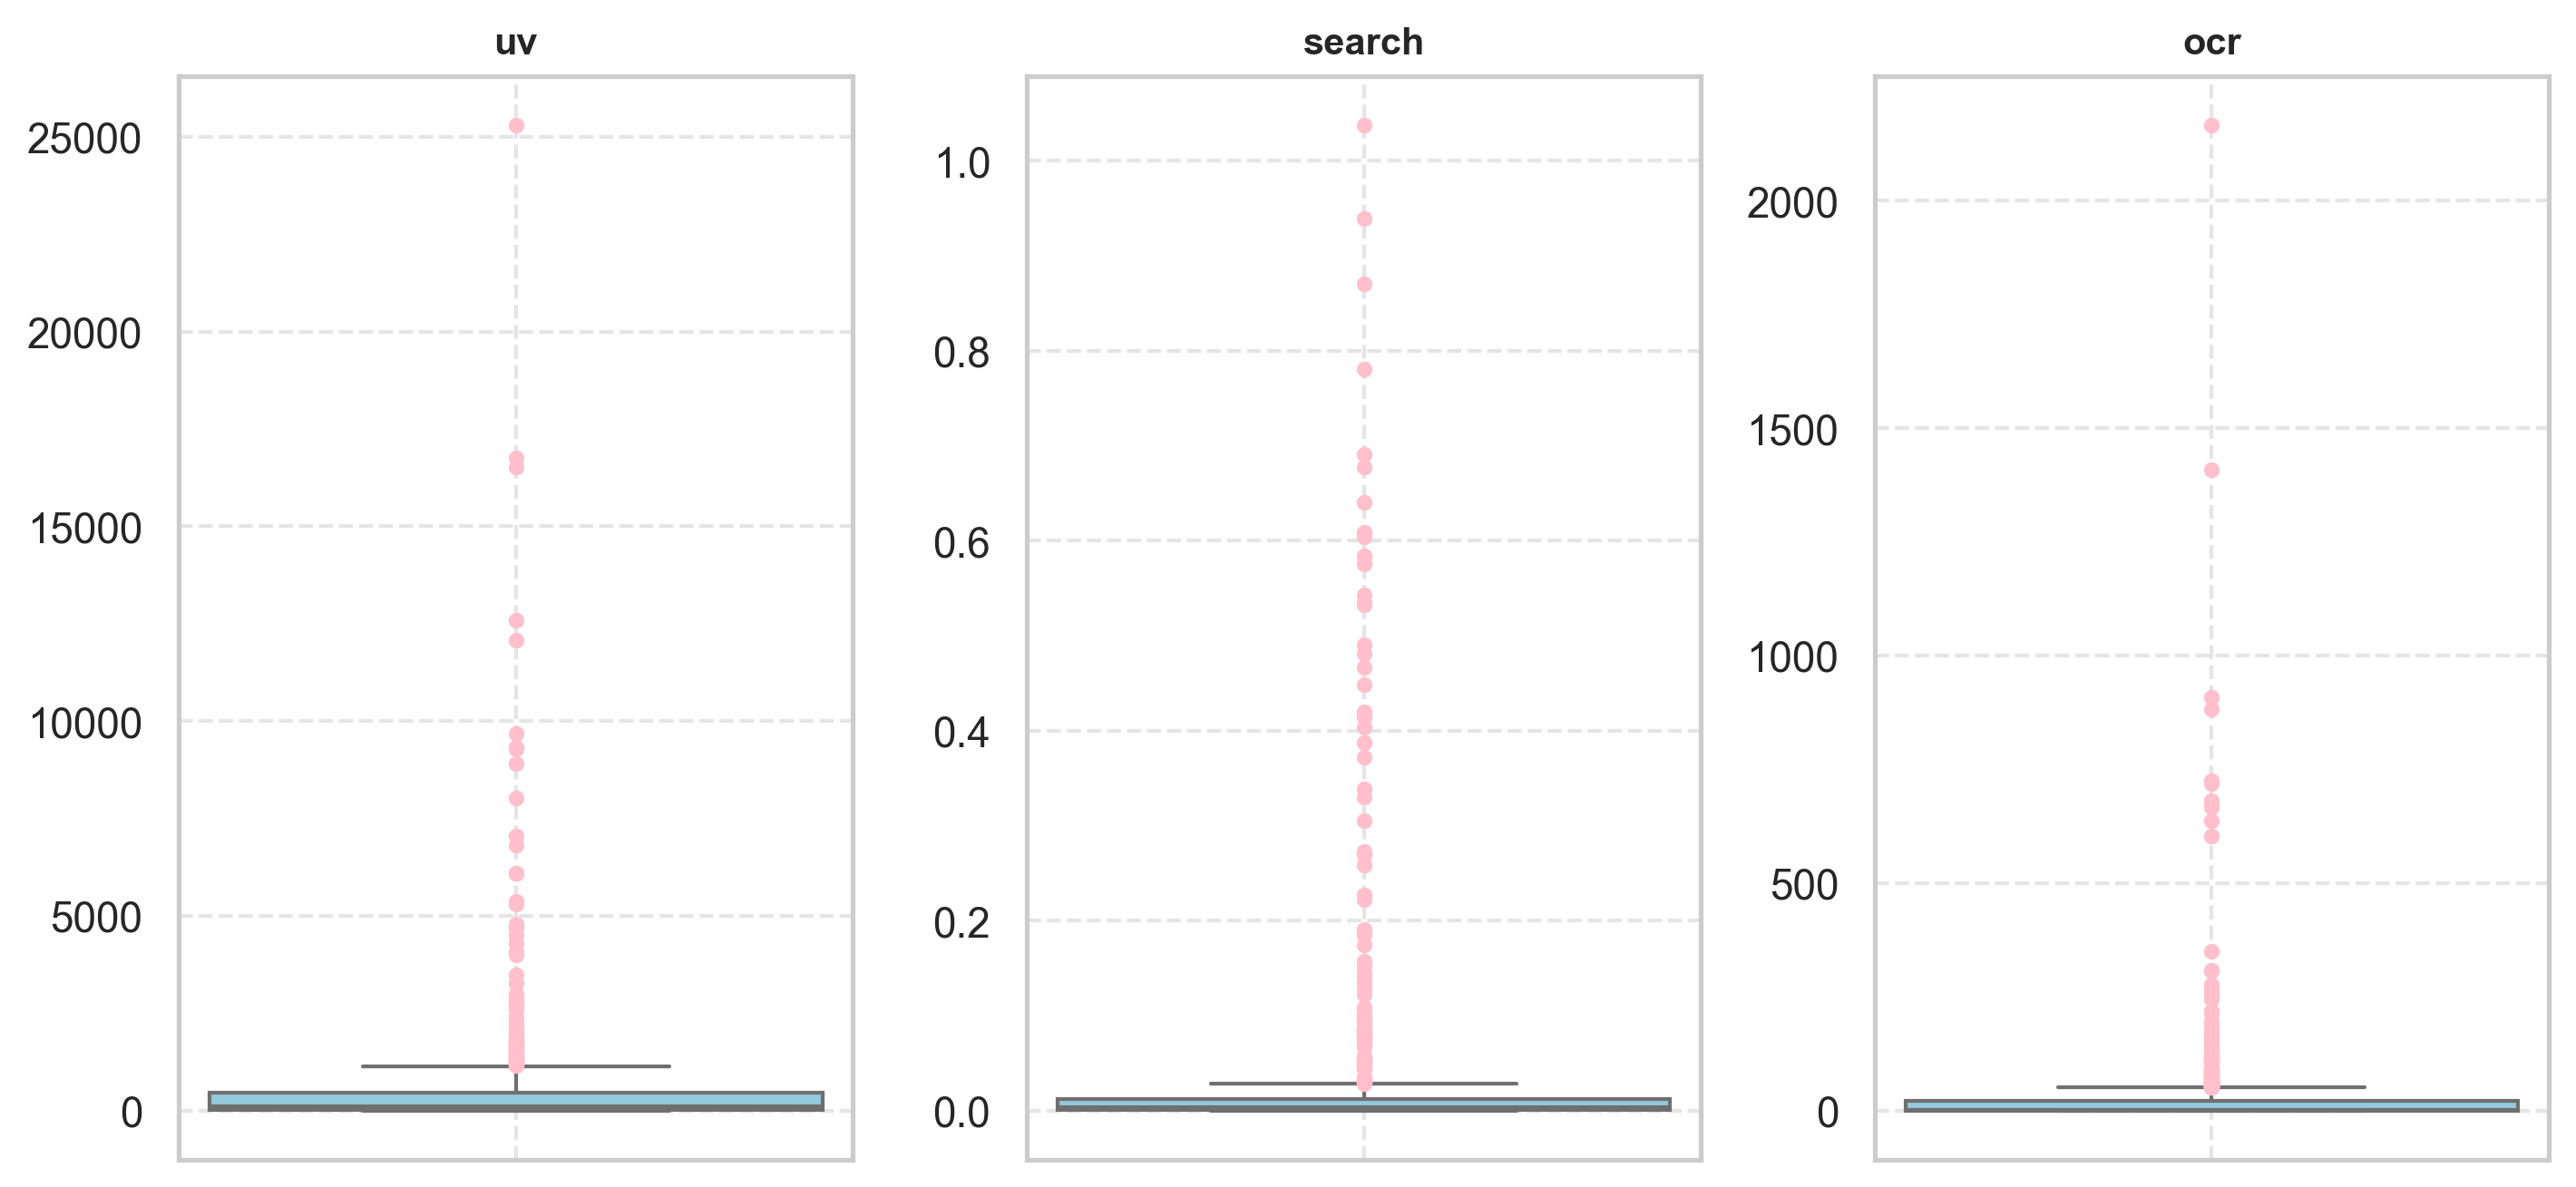

  Variable  Outliers  Total  Proportion (%)
0       uv        87    887            9.81
1   search       101    887           11.39
2      ocr       103    887           11.61


In [22]:
plot_outliers(main_num_cols, df)

## Remove Outliers

In [23]:
def remove_outliers_iqr(dataf, columns):
    """
    Remove rows containing outliers (using IQR method) for specified columns.
    """
    df_clean = dataf.copy()
    print(f"Shape before removing outliers: {df_clean.shape}")
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    print(f"Shape after removing outliers: {df_clean.shape}")
    return df_clean


In [24]:
df_no_outliers = remove_outliers_iqr(df, main_num_cols)
df_no_outliers.reset_index(drop=True, inplace=True)

Shape before removing outliers: (887, 12)
Shape after removing outliers: (625, 12)


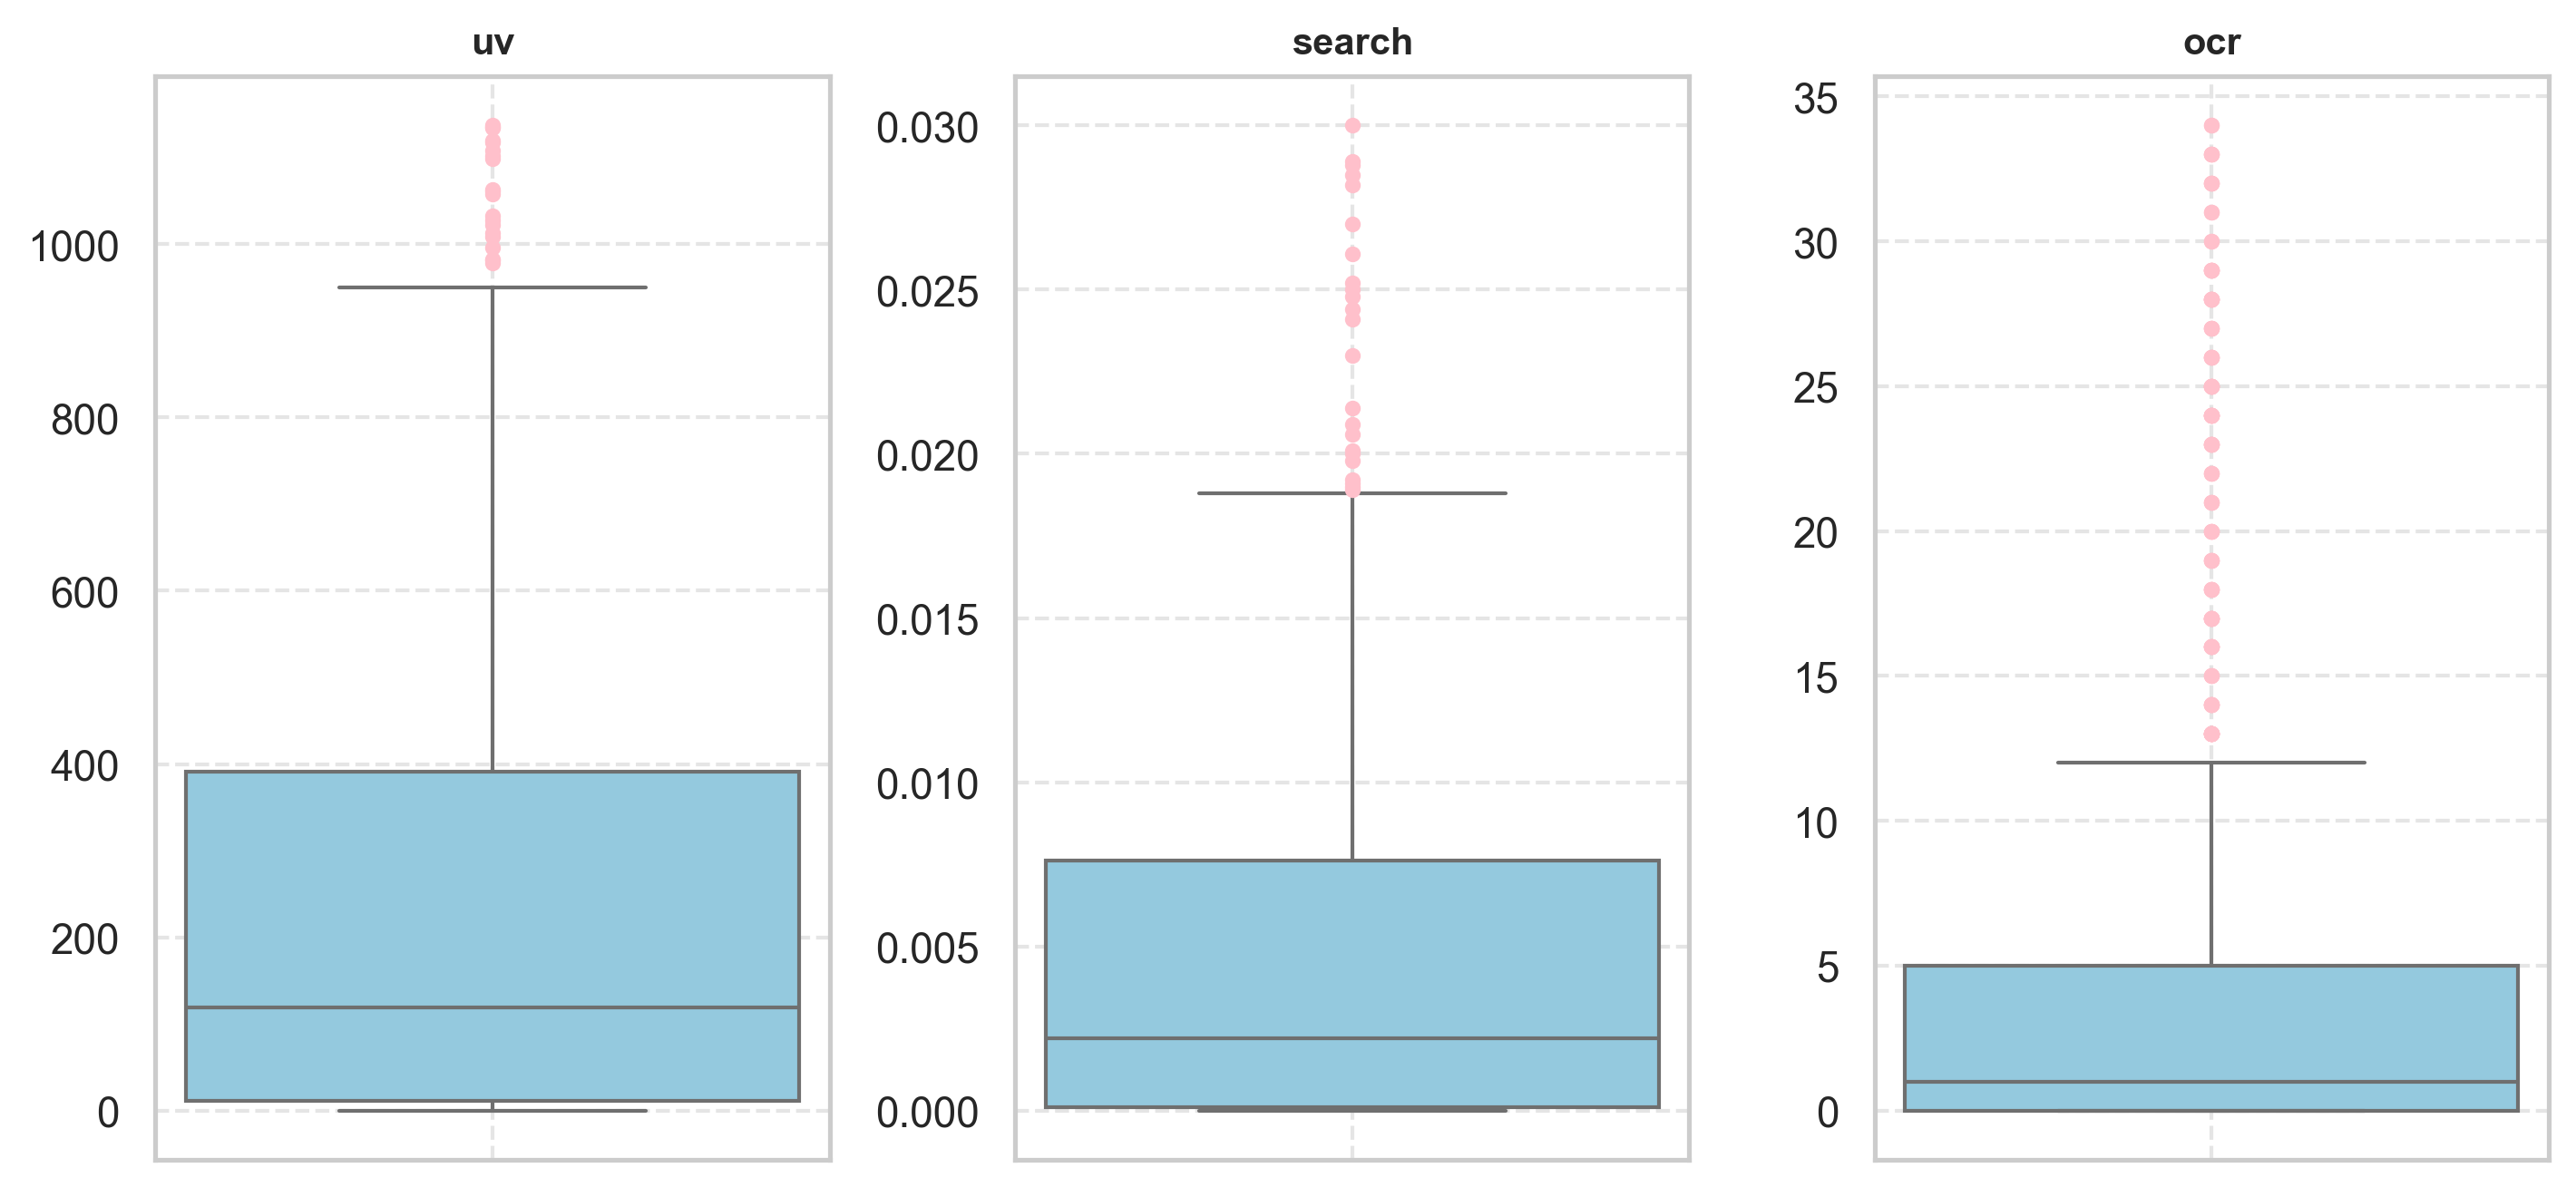

  Variable  Outliers  Total  Proportion (%)
0       uv        20    625            3.20
1   search        23    625            3.68
2      ocr       112    625           17.92


In [25]:
plot_outliers(main_num_cols,df_no_outliers)

In [ ]:
df_no_outliers.to_csv("ad_performance_no_outliers.csv", index=False)

In [57]:
print(f"{df_no_outliers['uv'].mean()}\n{df_no_outliers['search'].mean()}\nb{df_no_outliers["ocr"].mean()}")

238.26190400000002
0.00465536
b0.05112


In [59]:
show_process("Outliers removed")

Process
1       Data loaded
2       Êó†Áî®Êï∞ÊçÆÂà†Èô§+‰∏≠ÊñáÊõøÊç¢
3          'OCR'ÂàóËøòÂéü
4              Á©∫ÂÄºÂ§ÑÁêÜ
5   Columns defined
6  Outliers removed

## Scaling of num_cols
Robust Scaling for MOC-MLP and Regression-MLP

In [4]:
def scale_with_robust_scaler(df, columns, scaler_save_path="scalers"):
    """
    ‰ΩøÁî® RobustScaler ÂØπÊåáÂÆöÂàóËøõË°åÁº©ÊîæÔºàÂü∫‰∫é‰∏≠‰ΩçÊï∞Âíå IQRÔºâÔºåÂπ∂‰øùÂ≠òÊØèÂàóÁöÑ scaler„ÄÇ
    
    ÂèÇÊï∞Ôºö
        df: pandas DataFrame
        columns: Ë¶ÅÁº©ÊîæÁöÑÂàóÂêçÂàóË°®
        scaler_save_path: ‰øùÂ≠ò scaler ÁöÑÊñá‰ª∂Â§πË∑ØÂæÑÔºàÈªòËÆ§‰∏∫ "scalers"Ôºâ

    ËøîÂõûÔºö
        Áº©ÊîæÂêéÁöÑ DataFrame
    """
    original_shape = df.shape
    df_scaled = df.copy()

    # ÂàõÂª∫‰øùÂ≠òË∑ØÂæÑ
    os.makedirs(scaler_save_path, exist_ok=True)

    for col in columns:
        scaler = RobustScaler()
        df_scaled[col] = scaler.fit_transform(df[[col]])
        
        # ‰øùÂ≠ò scaler Âà∞ÊåáÂÆöË∑ØÂæÑÔºå‰ª•ÂàóÂêçÂëΩÂêç
        scaler_path = os.path.join(scaler_save_path, f"{col}_robust_scaler.pkl")
        joblib.dump(scaler, scaler_path)

    print(f"‚úÖ Scaling complete using RobustScaler.")
    print(f"üìè Áº©ÊîæÂàó: {columns}")
    print(f"üíæ ÊâÄÊúâ scaler Â∑≤‰øùÂ≠òËá≥Êñá‰ª∂Â§π: '{scaler_save_path}'")

    return df_scaled

In [8]:
df_to_scale = pd.read_csv("/Users/JackRuan/ÊñáÁ®ø(un-iCloud)/VScode_ipynb/CAPSTONE/Pipelines/balanced_output_smote(2).csv", index_col=False)

In [9]:
df_robust_scaled = scale_with_robust_scaler(df_to_scale, main_num_cols, scaler_save_path="scalers")

‚úÖ Scaling complete using RobustScaler.
üìè Áº©ÊîæÂàó: ['uv', 'search', 'ocr']
üíæ ÊâÄÊúâ scaler Â∑≤‰øùÂ≠òËá≥Êñá‰ª∂Â§π: 'scalers'


In [63]:
df_robust_scaled= df_robust_scaled[main_num_cols + main_cat_cols]
df_robust_scaled

uv    search  ocr material placement payment  sellingpoint
0    0.015820  1.440000  3.4      jpg    banner     cpc  Spend & Save
1   -0.010950  2.160000  3.4      jpg    banner     cpc  Spend & Save
2   -0.281198  2.213333  4.6      jpg    banner     cpc  Spend & Save
3   -0.312706  1.373333 -0.2      jpg    banner     cpc  Spend & Save
4    0.760391  1.266667  4.8      jpg    banner     cpc  Spend & Save
..        ...       ...  ...      ...       ...     ...           ...
620  1.406781  1.173333  0.2      swf      tips     cpc  Spend & Save
621  1.508884  0.160000  0.4      swf      tips     cpc  Spend & Save
622  0.587560  1.053333  1.8      swf      tips     cpc      Discount
623  0.444368 -0.160000  0.0      swf      tips     cpc      Discount
624  0.502724  0.080000  0.0      swf      tips     cpc      Discount

[625 rows x 7 columns]

In [65]:
show_process("num_cols scaled with RobustScaler")

Process
1                        Data loaded
2                        Êó†Áî®Êï∞ÊçÆÂà†Èô§+‰∏≠ÊñáÊõøÊç¢
3                           'OCR'ÂàóËøòÂéü
4                               Á©∫ÂÄºÂ§ÑÁêÜ
5                    Columns defined
6                   Outliers removed
7  num_cols scaled with RobustScaler

# cat_var Handle

In [66]:
print(main_cat_cols)
for a in main_cat_cols:
    print(f"{a} unique:", df_robust_scaled[a].unique())
    print(f"{a} value counts:\n", df_robust_scaled[a].value_counts())


['material', 'placement', 'payment', 'sellingpoint']
material unique: ['jpg' 'swf' 'gif']
material value counts:
 material
jpg    403
swf    219
gif      3
Name: count, dtype: int64
placement unique: ['banner' 'tips' 'uncertained' 'sub-banner']
placement value counts:
 placement
sub-banner     281
uncertained    208
banner          99
tips            37
Name: count, dtype: int64
payment unique: ['cpc' 'cpm' 'roi' 'cpd']
payment value counts:
 payment
cpc    396
roi    174
cpm     38
cpd     17
Name: count, dtype: int64
sellingpoint unique: ['Spend & Save' 'Gift with Purchase' 'Flash Sale' 'Discount' 'Price Drop'
 'Cash/Coupon-Back']
sellingpoint value counts:
 sellingpoint
Price Drop            264
Discount              143
Spend & Save          107
Cash/Coupon-Back       47
Gift with Purchase     34
Flash Sale             30
Name: count, dtype: int64


## OneHotCoding

Êé•‰∏ãÊù•,Áî®df_robust_scaledÂÅöMLP-regression

In [68]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [69]:
cat_encoded = encoder.fit_transform(df_robust_scaled[main_cat_cols])
cat_encoded_df = pd.DataFrame(
    cat_encoded,
    columns=encoder.get_feature_names_out(main_cat_cols),
    index=df_robust_scaled.index
)

In [70]:
cat_encoded_df

material_gif  material_jpg  material_swf  placement_banner  \
0             0.0           1.0           0.0               1.0   
1             0.0           1.0           0.0               1.0   
2             0.0           1.0           0.0               1.0   
3             0.0           1.0           0.0               1.0   
4             0.0           1.0           0.0               1.0   
..            ...           ...           ...               ...   
620           0.0           0.0           1.0               0.0   
621           0.0           0.0           1.0               0.0   
622           0.0           0.0           1.0               0.0   
623           0.0           0.0           1.0               0.0   
624           0.0           0.0           1.0               0.0   

     placement_sub-banner  placement_tips  placement_uncertained  payment_cpc  \
0                     0.0             0.0                    0.0          1.0   
1                     0.0             0.0                    0.0          1.0   
2                     0.0             0.0                    0.0          1.0   
3                     0.0             0.0                    0.0          1.0   
4                     0.0             0.0                    0.0          1.0   
..                    ...             ...                    ...          ...   
620                   0.0             1.0                    0.0          1.0   
621                   0.0             1.0                    0.0          1.0   
622                   0.0             1.0                    0.0          1.0   
623                   0.0             1.0                    0.0          1.0   
624                   0.0             1.0                    0.0          1.0   

     payment_cpd  payment_cpm  payment_roi  sellingpoint_Cash/Coupon-Back  \
0            0.0          0.0          0.0                            0.0   
1            0.0          0.0          0.0                            0.0   
2            0.0          0.0          0.0                            0.0   
3            0.0          0.0          0.0                            0.0   
4            0.0          0.0          0.0                            0.0   
..           ...          ...          ...                            ...   
620          0.0          0.0          0.0                            0.0   
621          0.0          0.0          0.0                            0.0   
622          0.0          0.0          0.0                            0.0   
623          0.0          0.0          0.0                            0.0   
624          0.0          0.0          0.0                            0.0   

     sellingpoint_Discount  sellingpoint_Flash Sale  \
0                      0.0                      0.0   
1                      0.0                      0.0   
2                      0.0                      0.0   
3                      0.0                      0.0   
4                      0.0                      0.0   
..                     ...                      ...   
620                    0.0                      0.0   
621                    0.0                      0.0   
622                    1.0                      0.0   
623                    1.0                      0.0   
624                    1.0                      0.0   

     sellingpoint_Gift with Purchase  sellingpoint_Price Drop  \
0                                0.0                      0.0   
1                                0.0                      0.0   
2                                0.0                      0.0   
3                                0.0                      0.0   
4                                0.0                      0.0   
..                               ...                      ...   
620                              0.0                      0.0   
621                              0.0                      0.0   
622                              0.0                    

In [71]:
cat_encoded_df.columns.tolist()

['material_gif',
 'material_jpg',
 'material_swf',
 'placement_banner',
 'placement_sub-banner',
 'placement_tips',
 'placement_uncertained',
 'payment_cpc',
 'payment_cpd',
 'payment_cpm',
 'payment_roi',
 'sellingpoint_Cash/Coupon-Back',
 'sellingpoint_Discount',
 'sellingpoint_Flash Sale',
 'sellingpoint_Gift with Purchase',
 'sellingpoint_Price Drop',
 'sellingpoint_Spend & Save']

In [72]:
df_mlp_moc = pd.concat([df_robust_scaled[['uv','search']], cat_encoded_df], axis=1)

In [74]:
df_mlp_reg = pd.concat([df_robust_scaled[['uv','search','ocr']], cat_encoded_df], axis=1)
df_mlp_reg

uv    search  ocr  material_gif  material_jpg  material_swf  \
0    0.015820  1.440000  3.4           0.0           1.0           0.0   
1   -0.010950  2.160000  3.4           0.0           1.0           0.0   
2   -0.281198  2.213333  4.6           0.0           1.0           0.0   
3   -0.312706  1.373333 -0.2           0.0           1.0           0.0   
4    0.760391  1.266667  4.8           0.0           1.0           0.0   
..        ...       ...  ...           ...           ...           ...   
620  1.406781  1.173333  0.2           0.0           0.0           1.0   
621  1.508884  0.160000  0.4           0.0           0.0           1.0   
622  0.587560  1.053333  1.8           0.0           0.0           1.0   
623  0.444368 -0.160000  0.0           0.0           0.0           1.0   
624  0.502724  0.080000  0.0           0.0           0.0           1.0   

     placement_banner  placement_sub-banner  placement_tips  \
0                 1.0                   0.0             0.0   
1                 1.0                   0.0             0.0   
2                 1.0                   0.0             0.0   
3                 1.0                   0.0             0.0   
4                 1.0                   0.0             0.0   
..                ...                   ...             ...   
620               0.0                   0.0             1.0   
621               0.0                   0.0             1.0   
622               0.0                   0.0             1.0   
623               0.0                   0.0             1.0   
624               0.0                   0.0             1.0   

     placement_uncertained  payment_cpc  payment_cpd  payment_cpm  \
0                      0.0          1.0          0.0          0.0   
1                      0.0          1.0          0.0          0.0   
2                      0.0          1.0          0.0          0.0   
3                      0.0          1.0          0.0          0.0   
4                      0.0          1.0          0.0          0.0   
..                     ...          ...          ...          ...   
620                    0.0          1.0          0.0          0.0   
621                    0.0          1.0          0.0          0.0   
622                    0.0          1.0          0.0          0.0   
623                    0.0          1.0          0.0          0.0   
624                    0.0          1.0          0.0          0.0   

     payment_roi  sellingpoint_Cash/Coupon-Back  sellingpoint_Discount  \
0            0.0                            0.0                    0.0   
1            0.0                            0.0                    0.0   
2            0.0                            0.0                    0.0   
3            0.0                            0.0                    0.0   
4            0.0                            0.0                    0.0   
..           ...                            ...                    ...   
620          0.0                            0.0                    0.0   
621          0.0                            0.0                    0.0   
622          0.0                            0.0                    1.0   
623          0.0                            0.0                    1.0   
624          0.0                            0.0                    1.0   

     sellingpoint_Flash Sale  sellingpoint_Gift with Purchase  \
0                        0.0                              0.0   
1                        0.0                              0.0   
2                        0.0                              0.0   
3                        0.0                              0.0   
4                        0.0                              0.0   
..                       ...                              ...   
620                      0.0                              0.0   
621                      0.0                              0.0   
622                      0.0                              0.0 

In [75]:
df_mlp_moc

uv    search  material_gif  material_jpg  material_swf  \
0    0.015820  1.440000           0.0           1.0           0.0   
1   -0.010950  2.160000           0.0           1.0           0.0   
2   -0.281198  2.213333           0.0           1.0           0.0   
3   -0.312706  1.373333           0.0           1.0           0.0   
4    0.760391  1.266667           0.0           1.0           0.0   
..        ...       ...           ...           ...           ...   
620  1.406781  1.173333           0.0           0.0           1.0   
621  1.508884  0.160000           0.0           0.0           1.0   
622  0.587560  1.053333           0.0           0.0           1.0   
623  0.444368 -0.160000           0.0           0.0           1.0   
624  0.502724  0.080000           0.0           0.0           1.0   

     placement_banner  placement_sub-banner  placement_tips  \
0                 1.0                   0.0             0.0   
1                 1.0                   0.0             0.0   
2                 1.0                   0.0             0.0   
3                 1.0                   0.0             0.0   
4                 1.0                   0.0             0.0   
..                ...                   ...             ...   
620               0.0                   0.0             1.0   
621               0.0                   0.0             1.0   
622               0.0                   0.0             1.0   
623               0.0                   0.0             1.0   
624               0.0                   0.0             1.0   

     placement_uncertained  payment_cpc  payment_cpd  payment_cpm  \
0                      0.0          1.0          0.0          0.0   
1                      0.0          1.0          0.0          0.0   
2                      0.0          1.0          0.0          0.0   
3                      0.0          1.0          0.0          0.0   
4                      0.0          1.0          0.0          0.0   
..                     ...          ...          ...          ...   
620                    0.0          1.0          0.0          0.0   
621                    0.0          1.0          0.0          0.0   
622                    0.0          1.0          0.0          0.0   
623                    0.0          1.0          0.0          0.0   
624                    0.0          1.0          0.0          0.0   

     payment_roi  sellingpoint_Cash/Coupon-Back  sellingpoint_Discount  \
0            0.0                            0.0                    0.0   
1            0.0                            0.0                    0.0   
2            0.0                            0.0                    0.0   
3            0.0                            0.0                    0.0   
4            0.0                            0.0                    0.0   
..           ...                            ...                    ...   
620          0.0                            0.0                    0.0   
621          0.0                            0.0                    0.0   
622          0.0                            0.0                    1.0   
623          0.0                            0.0                    1.0   
624          0.0                            0.0                    1.0   

     sellingpoint_Flash Sale  sellingpoint_Gift with Purchase  \
0                        0.0                              0.0   
1                        0.0                              0.0   
2                        0.0                              0.0   
3                        0.0                              0.0   
4                        0.0                              0.0   
..                       ...                              ...   
620                      0.0                              0.0   
621                      0.0                              0.0   
622                      0.0                              0.0   
623                      0.0                             